# Visualizing High Dimensional Data
## CS6180 Spring 2020
### Amy Eisenmenger, u1209324

In [4]:
# setup
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances, pairwise
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import MDS, TSNE

from copy import deepcopy

# Problem 1


## Implement PCA as a function and provide a commented version of it. Feel free to compute eigenvectors, eigenvalues etc. using numpy or other api functionality.

In [5]:
dataset = load_iris()
data = dataset.data
labels = dataset.target

In [6]:
def center_data(m):
    m -= m.mean(axis=0) 
    return m

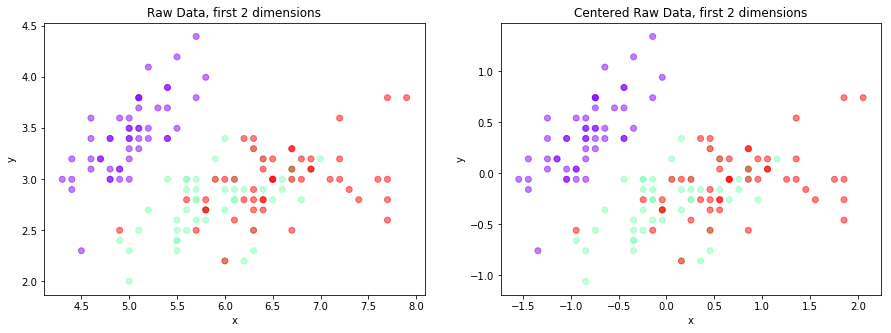

In [7]:
# pca(data)
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.scatter(data[:,0],data[:,1], c=labels, cmap='rainbow', alpha=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Raw Data, first 2 dimensions")
# plt.show()

plt.subplot(122)
C =  deepcopy(dataset.data)
C = center_data(C)
plt.scatter(C[:,0],C[:,1], c=labels, cmap='rainbow', alpha=0.5)
# plt.scatter(labels, color="black")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Centered Raw Data, first 2 dimensions")
plt.show()

In [8]:
def covariance(M):
    covariance = np.dot(M.T, M)/(len(M)-1) #np.cov() scales by (n-1) instead of n
    cov = np.cov(M.T) # calculate np.cov covaraince as sanity check
    
    # check that the two covariance calculations are close
    if not np.allclose(covariance, cov):
        print("Hand calculated covariace and numpy covariance are not close")
    return covariance


In [9]:
def pca(d, k, center=True):
    # make sure desired value of dimensions is less than current 
    if k > len(d[0]):
        print("k is greater than data dimensions")
        return None
    
    # center the data at origin
    if center == True:
        print("centering the data")
        d = center_data(d)
    else:
        print("skipping centering")
    
    # compute d x d covariance matrix
    covar = covariance(d)
    
    # compute eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(covar) #lambda, U
    
    #sort both by descending eigenvalue
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[idx]



    # get top k eigenvectors
    UkT = eigenvectors.T[:k]
    # compute k-dimensional embedding Xtilde =  UTk X
    Z = UkT.dot(d.T)

    return Z.T #n x k 

## Plot (with a scatter plot) the iris dataset using your PCA implementation. Color each of the species differently. On a separate plot provide a scatter plot of the language api (sklearn) PCA for comparison

In [10]:
dim = 2
d1 =  deepcopy(dataset.data)
embedding = pca(d1,dim)

# compare to sklearn implementation
d2 =  deepcopy(dataset.data)
p = PCA(dim)
base = p.fit_transform(d2) #automatically centers the data

centering the data


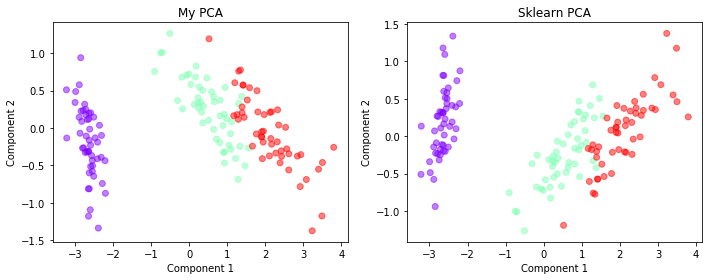

In [11]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.scatter(embedding[:,0],embedding[:,1], c=labels, cmap='rainbow', alpha=0.5)
plt.title("My PCA")
plt.xlabel("Component 1")
plt.ylabel("Component 2")

plt.subplot(122)
plt.scatter(base[:,0],base[:,1], c=labels, cmap='rainbow', alpha=0.5)
# plt.scatter(labels, color="black")
plt.title("Sklearn PCA")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.tight_layout()
plt.show()


These are exactly the same except the y-axis signs are flipped.

## Run K-Means on these results with k=2 and plot the results color according to cluster.

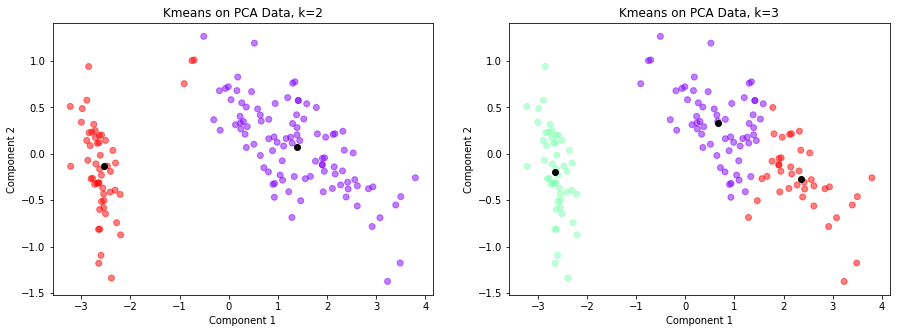

In [12]:
kmeans_cen = KMeans(n_clusters=2)
kmeans_cen.fit(embedding)

kmeans_cen2 = KMeans(n_clusters=3)
kmeans_cen2.fit(embedding)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.scatter(embedding[:,0],embedding[:,1], c=kmeans_cen.labels_, cmap='rainbow', alpha=0.5)
plt.scatter(kmeans_cen.cluster_centers_[:,0] ,kmeans_cen.cluster_centers_[:,1], color='black')

plt.title("Kmeans on PCA Data, k=2")
plt.xlabel("Component 1")
plt.ylabel("Component 2")


plt.subplot(122)
plt.scatter(embedding[:,0],embedding[:,1], c=kmeans_cen2.labels_, cmap='rainbow', alpha=0.5)
plt.scatter(kmeans_cen2.cluster_centers_[:,0] ,kmeans_cen2.cluster_centers_[:,1], color='black')

plt.title("Kmeans on PCA Data, k=3")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

I also plotted the data in 3D and clustered for 3 clusters to see how close PCA could get to recovering the 3D separation of species:

centering the data


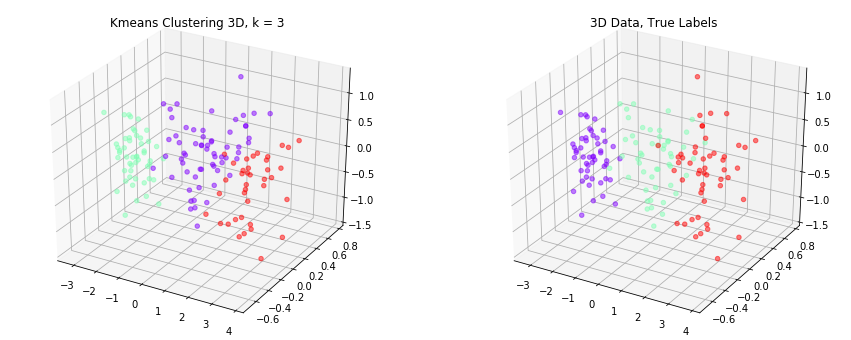

In [13]:
d3 =  deepcopy(dataset.data)
d3_emb = pca(d3, 3, True)

fig = plt.figure(figsize=(15,6))

kmeans_d3 = KMeans(n_clusters=3)
kmeans_d3.fit(d3_emb)
ax = fig.add_subplot(121, projection='3d')
ax.scatter(d3_emb[:,0],d3_emb[:,2],d3_emb[:,1], c=kmeans_d3.labels_, cmap='rainbow', alpha=0.5)
ax.set_title("Kmeans Clustering 3D, k = 3")

ax = fig.add_subplot(122, projection='3d')
ax.scatter(d3_emb[:,0],d3_emb[:,2],d3_emb[:,1], c=labels, cmap='rainbow', alpha=0.5)
ax.set_title("3D Data, True Labels")
plt.show()

## Now create an alternate PCA function where you do not center the data. Using a scatter plot, show the results. Again, color each of the species differently.

Note: I simply added a boolean 'center' parameter and 'if' statement to my original pca method to determine whether or not to center the data.

skipping centering
Hand calculated covariace and numpy covariance are not close


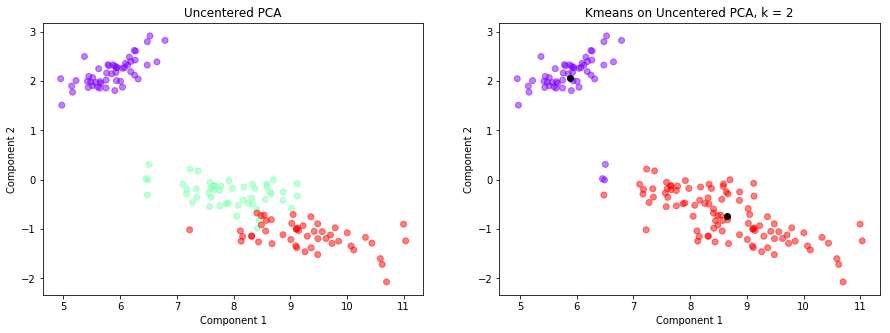

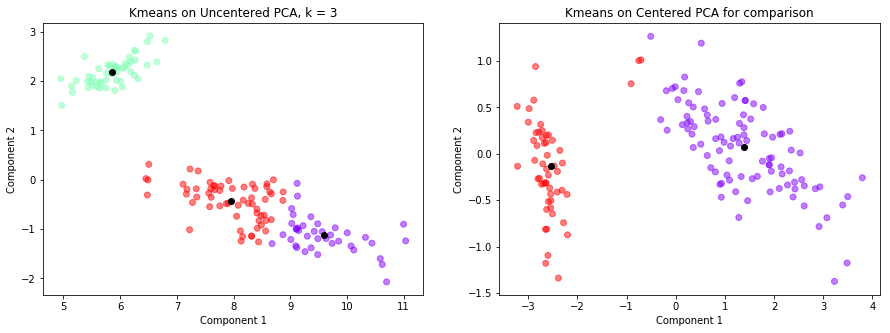

In [14]:
d4 =  deepcopy(dataset.data)
uncentered_embedding = pca(d4, 2, False)

kmeans_uc = KMeans(n_clusters=2)
kmeans_uc.fit(uncentered_embedding)

kmeans_uc2 = KMeans(n_clusters=3)
kmeans_uc2.fit(uncentered_embedding)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.scatter(uncentered_embedding[:,0],uncentered_embedding[:,1], c=labels, cmap='rainbow', alpha=0.5)
# plt.scatter(labels, color="black")
plt.title("Uncentered PCA")
plt.xlabel("Component 1")
plt.ylabel("Component 2")

plt.subplot(122)
plt.scatter(uncentered_embedding[:,0],uncentered_embedding[:,1], c=kmeans_uc.labels_, cmap='rainbow', alpha=0.5)
plt.scatter(kmeans_uc.cluster_centers_[:,0] ,kmeans_uc.cluster_centers_[:,1], color='black')
plt.title("Kmeans on Uncentered PCA, k = 2")
plt.xlabel("Component 1")
plt.ylabel("Component 2")


plt.figure(figsize=(15,5))
plt.subplot(121)
plt.scatter(uncentered_embedding[:,0],uncentered_embedding[:,1], c=kmeans_uc2.labels_, cmap='rainbow', alpha=0.5)
plt.scatter(kmeans_uc2.cluster_centers_[:,0] ,kmeans_uc2.cluster_centers_[:,1], color='black')
plt.title("Kmeans on Uncentered PCA, k = 3")
plt.xlabel("Component 1")
plt.ylabel("Component 2")

plt.subplot(122)
plt.scatter(embedding[:,0],embedding[:,1], c=kmeans_cen.labels_, cmap='rainbow', alpha=0.5)
plt.scatter(kmeans_cen.cluster_centers_[:,0] ,kmeans_cen.cluster_centers_[:,1], color='black')

plt.title("Kmeans on Centered PCA for comparison")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

In [15]:
if np.allclose(covariance(C), covariance(data)):
    print("Covariance matrix of centered and uncentered data is the same")
if not np.allclose(embedding, uncentered_embedding):
    print("Centered and not centered PCA produce different results")

Hand calculated covariace and numpy covariance are not close
Centered and not centered PCA produce different results


## What is the effect of neglecting to center the data? What type of data would not work well for PCA and why?

Centering data:

Neglecting to center the data changes modified the scale and direction of the pricipal components found. It looks as though rather than capturing variation in the data, one of the pricipal components is capturing the variation from the origin. To figure out why, I looked at the computed covariance matrix and eigendecomposition. Empirically, I tested equivalence between the centered and uncentered covariance matrices and their eigenvectors. The matrices were obviously different, as were the top eigenvectors. For the centered data, the top eigenvectors are [ 0.36, -0.08,  0.86,  0.36 ] and [-0.66, -0.73, 0.17,  0.08]. For the uncentered data, they are instead [ 0.75,  0.38, 0.51, 0.17] and [ 0.28,  0.55, -0.71, -0.34]. The difference is caused by our method for calculating the covariance matrix.
        
In PCA, we want to find the directions of maximum variance by computing the eigendecomposition on the covariance matrix. The covariance matrix computes the average squared deviation (variance) from the mean. Theoretically then, centering the data should not affect covariance. However, in our implementation of PCA, we compute the covariance matrix on our data $\textbf{X}$ as $\frac{\textbf{X}^T\textbf{X}}{n-1}$. Generally, $\frac{\textbf{X}^T\textbf{X}}{n-1}$ computes the sum of squared deviations from the origin, which is equivalent to the covariance matrix only when $\textbf{X}$ is centered. Without centering the data, we run the risk of finding and wasting a principal component that represents the direction of variance of the data from the origin. Since we did not center the data for one experiment, we computed a different 'covariance' matrix, which led to a different eigendecomposition and discovering different pricipal components.

Where PCA does not perform well:

PCA is a linear transformation that finds k orthogonal directions of maximum variance as the new axes. 

An obvious case in which PCA will not work well is if the underlying structure of the points is not linear. For example, imagine points coiled in the shape of a spiral. No matter which directions of maximum variance PCA finds, none of these will be the desired non-linear transformation that uncoils the spiral into a line. 

When the underlying data structure is linear, PCA will not work well when mean and covariance to not describe the data or the interesting dimension does not fall in the k highest directions of variance. We can visualize a dataset of this type in three dimensions with two cluster. In two of the dimensions, the data has a gaussian distribution and looks like two roughly circular clusters that completely overlap. When we look at the third dimension however, we see that the data has a binomial distribution that separates the two cluster distinctly. If this binomial distribution has lower variance than the other two dimensions, it will not be selected as a principle component if we try to reduce the dimensions from three to two even though it is actually the most important direction for finding meaning in the data.

Another case is if the variables in the data have widely ranging scales or units, PCA may not perform well because the larger scales are overwhelming the variance calculations. Standardizing can help this where appropriate, but there is some debate as to whether clustering on data variables with such different units is appropriate or meaningful.

When the data is linear but the desired directions of maximum variance are not orthogonal, PCA will still not work well. For example, take a data clustered along the arms of a "V" with an acute angle. Ideally, one principal component would be aligned along each arm dimension. However, they are not orthogonal so the first principal component of PCA will be in the direction from the intersection of the arms toward the midpoint of their tips. The second would then be orthogonally in the direction from arm cap to arm cap. 


# Problem 2 

1. Using MDS plot (scatter plot) the same iris data set using 2 different metrics for the dissimilarity matrix: (cosine, manhattan) coloring by label.

In [34]:
n = len(data)
d6 =  deepcopy(dataset.data)
d6c = center_data(d6)
# calculate manhattan/L1/cityblock distance
L1_dist  = pairwise_distances(d6c, d6c, metric='manhattan')
# calculate cosine similarity 
d8 =  deepcopy(dataset.data)
cos_sim_uc = 1 - pairwise_distances(d8, d8, metric='cosine')
d8c = center_data(d8)
cos_sim_cen = 1 - pairwise_distances(d8, d8, metric='cosine')

In [35]:
mds_man = MDS(n_components=2, dissimilarity="precomputed", random_state=0)
man = mds_man.fit_transform(L1_dist) # shape (n_components, n_samples)

mds_cos_uc = MDS(n_components=2, dissimilarity="precomputed", random_state=0)
cos_uc = mds_cos.fit_transform(cos_sim_uc) # shape (n_components, n_samples)

mds_cos_cen = MDS(n_components=2, dissimilarity="precomputed", random_state=0)
cos_cen = mds_cos.fit_transform(cos_sim_cen) # shape (n_components, n_samples)

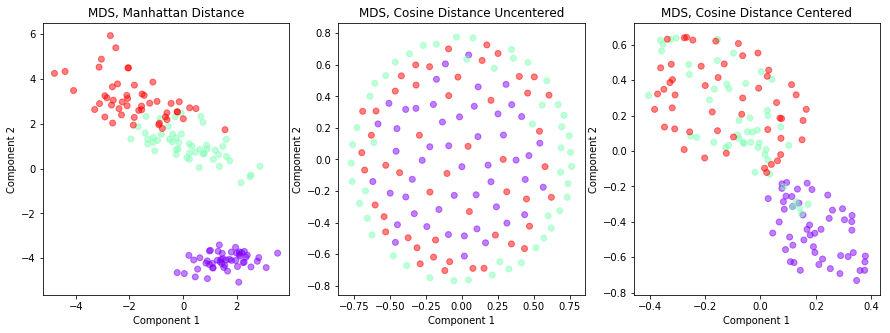

In [36]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.scatter(man[:,0],man[:,1], c=labels, cmap='rainbow', alpha=0.5)
plt.title("MDS, Manhattan Distance")
plt.xlabel("Component 1")
plt.ylabel("Component 2")


plt.subplot(132)
plt.scatter(cos_uc[:,0], cos_uc[:,1], c=labels, cmap='rainbow', alpha=0.5)
plt.title("MDS, Cosine Distance Uncentered")
plt.xlabel("Component 1")
plt.ylabel("Component 2")

plt.subplot(133)
plt.scatter(cos_cen[:,0], cos_cen[:,1], c=labels, cmap='rainbow', alpha=0.5)
plt.title("MDS, Cosine Distance Centered")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

## 2.  Run K-Means with k=2 on the output above and plot the results and color according to cluster.

In [38]:
kmeans_man = KMeans(n_clusters=2)
kmeans_man.fit(man)

kmeans_man2 = KMeans(n_clusters=3)
kmeans_man2.fit(man)

kmeans_cos = KMeans(n_clusters=2)
kmeans_cos.fit(cos_cen)

kmeans_cos2 = KMeans(n_clusters=3)
kmeans_cos2.fit(cos_cen)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

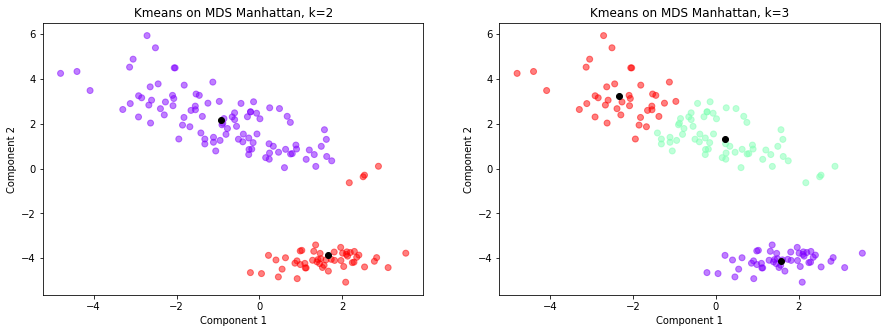

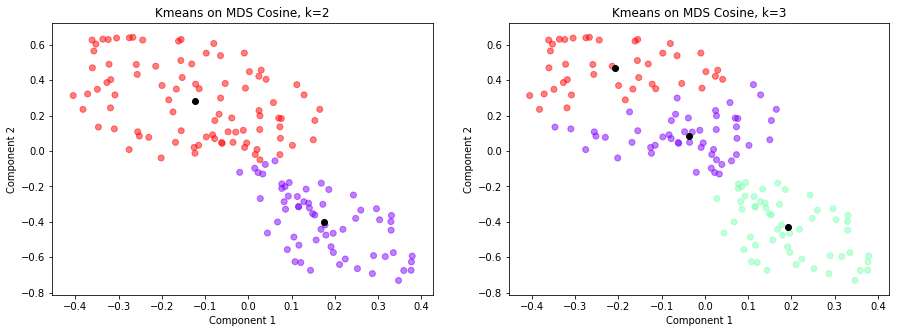

In [39]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.scatter(man[:,0],man[:,1], c=kmeans_man.labels_, cmap='rainbow', alpha=0.5)
plt.scatter(kmeans_man.cluster_centers_[:,0] ,kmeans_man.cluster_centers_[:,1], color='black')
plt.title("Kmeans on MDS Manhattan, k=2")
plt.xlabel("Component 1")
plt.ylabel("Component 2")

plt.subplot(122)
plt.scatter(man[:,0],man[:,1], c=kmeans_man2.labels_, cmap='rainbow', alpha=0.5)
plt.scatter(kmeans_man2.cluster_centers_[:,0] ,kmeans_man2.cluster_centers_[:,1], color='black')
plt.title("Kmeans on MDS Manhattan, k=3")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

plt.figure(figsize=(15,5))
plt.subplot(121)

plt.scatter(cos_cen[:,0],cos_cen[:,1], c=kmeans_cos.labels_, cmap='rainbow', alpha=0.5)
plt.scatter(kmeans_cos.cluster_centers_[:,0] ,kmeans_cos.cluster_centers_[:,1], color='black')
plt.title("Kmeans on MDS Cosine, k=2")
plt.xlabel("Component 1")
plt.ylabel("Component 2")

plt.subplot(122)
plt.scatter(cos_cen[:,0],cos_cen[:,1], c=kmeans_cos2.labels_, cmap='rainbow', alpha=0.5)
plt.scatter(kmeans_cos2.cluster_centers_[:,0] ,kmeans_cos2.cluster_centers_[:,1], color='black')
plt.title("Kmeans on MDS Cosine, k=3")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

# Problem 3

## Using T-SNE plot (scatter plot) the same iris data set coloring by label.

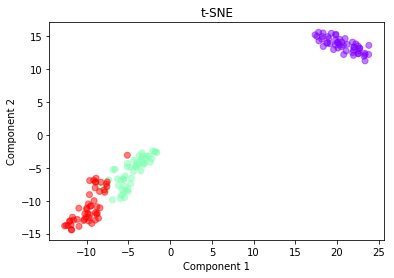

In [22]:
d7 =  deepcopy(dataset.data)
d7c = center_data(d7)
tsne = TSNE(n_components=2, random_state=0).fit_transform(d7c)
plt.scatter(tsne[:,0],tsne[:,1], c=dataset.target, cmap='rainbow', alpha=0.5)
plt.title("t-SNE")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

### 2.  Run K-Means with k=2 on the output above, plot the results and color according to cluster.

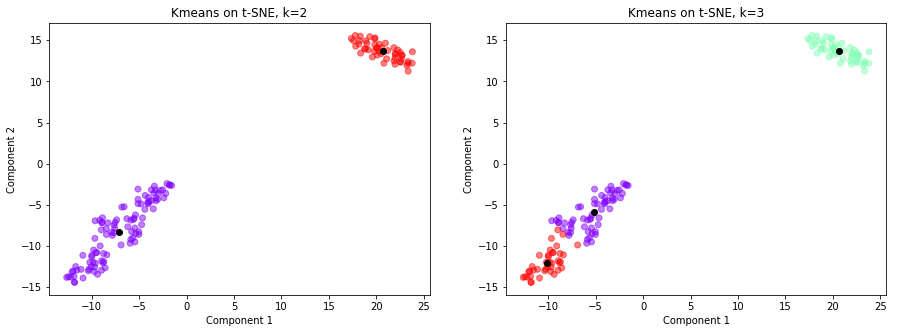

In [24]:
# d9 =  deepcopy(dataset.data)
# d9c = center_data(d7)
# tsne2 = TSNE(n_components=2).fit_transform(d9c)

kmeans_tsne = KMeans(n_clusters=2)
kmeans_tsne.fit(tsne)
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.scatter(tsne[:,0],tsne[:,1], c=kmeans_tsne.labels_, cmap='rainbow', alpha=0.5)
plt.scatter(kmeans_tsne.cluster_centers_[:,0] ,kmeans_tsne.cluster_centers_[:,1], color='black')
plt.title("Kmeans on t-SNE, k=2")
plt.xlabel("Component 1")
plt.ylabel("Component 2")


kmeans_tsne3 = KMeans(n_clusters=3)
kmeans_tsne3.fit(tsne)
plt.subplot(122)
plt.scatter(tsne[:,0],tsne[:,1], c=kmeans_tsne3.labels_, cmap='rainbow', alpha=0.5)
plt.scatter(kmeans_tsne3.cluster_centers_[:,0] ,kmeans_tsne3.cluster_centers_[:,1], color='black')
plt.title("Kmeans on t-SNE, k=3")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

## Compare and contrast the results from the plots generated from all 3 problems. Also, discuss any patterns or clusters that resulted from running the K-Means algorithm on all 3 problems.

My implementation of PCA produced the same results as sklearn's PCA. In two dimensions it produced two distinct, elliptical clusters oriented in roughly the same direction. The smaller of the two clusters represented a single species while the other cluster is actually two species side by side. The range of the first principal component shown on the x-axis is from -3 to 4 while the second principal component on the y axis ranges from -1.5 to 1. 

Interestingly, Kmeans with k=2 did find even the two obvious visual clusters well. A few of the points in the larger cluster were clustered with the smaller visual cluster. This does not make visual sense because there is such a large space between the two clusters that contain no points, even if by euclidean distance some of these points are closer to the small cluster than the cluster center of the large cluster. Adding a third cluster center, as expected, split the larger cluster in two. If the third species were to be mostly recovered, the split needed to be almost vertical with a slight lean to the left. However, the cluster was actually split on a diagonal leaning to the right. This resulted in the stray datapoints previously included in the smaller cluster being clustered with one of the new clusters. This was a fair approximation of the species spread, but obviously was not able to accurately seperate the originally overlapping clusters. 

When the data was not centered, PCA still produced two visually distinct clusters but the principal components were different in this calculation and one likely capture the variation from the origin rather than variation in the data itself. The orientation of the smaller cluster's ellipse was closer to perpendicular to the orientation of the larger cluster. Interestingly, the two species of the larger cluster still overlapped somewhat but they more or less occupied the left and right sides of the cluster. Here the x-axis ranges from 4.5 to 11 and the y-axis from -2 to 3. 

Kmeans on the uncentered data also clustered a few points of the larger cluster with the smaller cluster like kmeans on the centered-data PCA. To recover the third species, the larger cluster should be split approximately horizontally now. However, when a third cluster center was added to kmeans, the cluster was again split in half on a slight vertical diagonal with a lean to the right like it was with the centered PCA.

Notes on MDS and t-SNE: I set the random_state variable to make plots reproducible. The following discussion is based on the plots shown above. They general patterns remain similar, though position and density of the clusters varied, especially for t-SNE.

MDS using Manhattan distance actually produced a data pattern similar to that of PCA. Generally, there were two visual clusters, one larger and more diffuse that represents two species and a denser smaller cluster that represents one of the original species. Like uncentered PCA, the smaller cluster was oriented closer to perpendicular to the larger cluster. However, these clusters were more diffuse than in PCA. Unlike PCA, the values on the x-axis ranged from -4 to 4 while the y axis values spanned -5 to 6.

Kmeans on MDS using the Manhattan distance metric also produced similar results as PCA, clustering a few of the larger cluster points with the smaller cluster. To recover the third species, the larger cluster should be split approximately horizontally as with the uncentered PCA representation. However, when a third cluster center was added to kmeans, the cluster was split in half on a right-leaning diagonal as seen before. 

MDS using cosine similarity produced a very different plot. I actually computed (1 - cosine_similary) for the distance since a higher cosine similarity should indicate 'closeness' in distance. I also ran it on the centered and uncentered dataset. The uncentered MDS produced a ring of one species. Inside this ring, the two other species seemed to be distributed fairly evenly. Kmeans clustering would obviously fail for this transformation so I analyzed the centered MDS instead. The centered MDS-cosine combination produced a filled figure '8' with one species occupying a loop and two species the other. Instead of oblong clusters, it produced a 'C' shape with most datapoints clustered and the top and bottom of the tips. The values on the x axis range from -0.4 and 0.4 and the y-axis  -0.8 to 0.6. The scale here was markedly different than the other methods, which makes sense since were are computing cosines. 

When I applied Kmeans for k=2, the loops of the '8' were clustered seperately, though this did not lead to any better clustering than the other methods. Adding another cluster center did not reveal anything new either. It simply split the larger loop into two clusters.

T-SNE produced a similar configuration as PCA. There were two visual clusters, the smaller cluster again representing one species and the larger two species. These clusters were far more tightly clustered than PCA along their longer axes (Note: With other random state settings, the clusters were not always as tight). Notably, the two clusters were also much further away from each other. Xaxis values ranged from -15 to 25 while the y-axis values were from -15 to 15.

Due to their better separation, Kmeans with k=2 on the t-SNE embedding was able to completely separate the small cluster species, which none of the other methods were able to do. Adding another cluster center, however, did not seem to improve over the other kmeans of k=3 on the other methods. Again, mostly recovering the two species in the larger visual cluster would have required splitting on a slightly left-leaning diagonal from vertical. However, kmeans split the cluster perpendicular to the cluster's longer axis.